In [4]:
# Saudi News Articles Analysis and Topic modeling  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from plotnine import *
from glob import glob
import numpy as np 
import arabicstopwords.arabicstopwords as stp
import missingno as msno
import re
from camel_tools.sentiment import SentimentAnalyzer
import nltk 
from farasa.stemmer import FarasaStemmer
from textblob_ar import TextBlob as tb
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from collections import Counter


In [6]:
#Download Arabic stopwords from NLTK 
#nltk.download()
nltk.download("stopwords")
arabic_stopwords_list = set(nltk.corpus.stopwords.words("arabic"))
sentiment = SentimentAnalyzer.pretrained()
detokenizer = Detok()
stemmer = FarasaStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AlaAlBinSaleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
arabic_stopwords_list.update(["فى","في","كل","لم","لن","له""من","هو","هي","قوة","كما","لها",'منذ',"وقد",'ولا',
"نفسه","لقاء","مقابل","هناك","وقال","وكان","نهاية","وقالت","وكانت","للامم","فيه",
"كلم","لكن","وفي","وقف","ولم","ومن","وهو","وهي","يوم","فيها","منها","مليار",
"لوكالة","يكون","يمكن","مليون","حيث","اكد","الا","اما","امس","السابق","التى","التي",
"اكثر","ايار","ايضا","ثلاثة","الذاتي","الاخيرة","الثاني","الثانية","الذى","الذي","الان",
"امام","ايام","خلال","حوالى","الذين","الاول","الاولى","بين","ذلك","دون","حول","حين","الف",
"الى","انه","اول","ضمن","انها","جميع","الماضي","الوقت","المقبل","اليوم","ـ","ف",
"و","و6","قد","لا","ما","مع","مساء","هذا","واحد","واضاف","واضافت","فان","قبل","قال","كان",
"لدى","نحو","هذه","وان","واكد","كانت","واوضح","مايو","ب","ا","أ","،","عشر","عدد","عدة","عشرة",
"عدم","عام","عاما","عن","عند","عندما","على","عليه","عليها","زيارة","سنة","سنوات","تم","ضد","بعد",
"بعض","اعادة","اعلنت","بسبب","حتى","اذا","احد","اثر","برس","باسم","غدا","شخصا","صباح","اطار",
"اربعة","اخرى","بان","اجل","غير","بشكل","حاليا","بن","به","ثم","اف","ان","او","اي","بها","صفر"
"أنه","بأن"])

In [2]:
files_list = glob('news_*')

dfs = [] 
for file in files_list:
    data = pd.read_json(file) 
    dfs.append(data) 

ArNews_df = pd.concat(dfs, ignore_index=True)

In [234]:
ArNews_df[12:18]

,source,url,date_extracted,title,author,content
12,3alyoum,http://www.3alyoum.com/news/local/a/66-إصابة-ف...,2015-08-08 06:30:46,66 إصابة فى 52 حادثا مروريا خلال 4 أيام بالباحة,,أحمد البشيري – الباحة\n صرح الناطق الإعلامي ل...
13,3alyoum,http://www.3alyoum.com/news/local/a/إخلاء-11-ش...,2015-08-08 06:30:50,إخلاء 11 شخصاً بسبب حريق بمبنى سكني في المدينة...,,سلوى المدني – عين اليوم\n تبلغ مركز التحكم وا...
14,3alyoum,http://www.3alyoum.com/news/local/a/فرص-ابتعاث...,2015-08-08 06:30:58,فرص ابتعاث للماجستير والدكتوراه بمدينة الملك ع...,,عين اليوم – مكة المكرمة\n أعلنت مدينة الملك ع...
15,3alyoum,http://www.3alyoum.com/news/local/a/نائب-أمير-...,2015-08-08 06:31:02,نائب أمير حائل يفتتح مبنى اليوم العائلي لنزلاء...,,ياسر الحربي – عين اليوم\n افتتح الأمير عبدالع...
16,3alyoum,http://www.3alyoum.com/news/a/إخماد-حريق-بمحل-...,2015-08-08 06:31:05,إخماد حريق بمحل أحذية دون إصابات بنجران,,عبدالرحمن الشهري - نجران صرح المتحدث الإعلامي...
17,3alyoum,http://www.3alyoum.com/finance/a/تعرّف-على-ملا...,2015-08-08 14:45:35,تعرّف على ملامح نظام العمل الجديد,,عين اليوم – متابعات\nأكدت اللجنة الوطنية العم...


In [3]:
len(ArNews_df)

31030

In [10]:
ArNews_df.isnull().values.any()

False

In [11]:
ArNews_df = ArNews_df.replace(r'^\s*$', np.nan, regex=True)

# dealing with missing values: 
ArNews_df.isnull().sum()

source               0
url                  0
date_extracted       0
title               67
author            4736
content            354
dtype: int64

<AxesSubplot:>

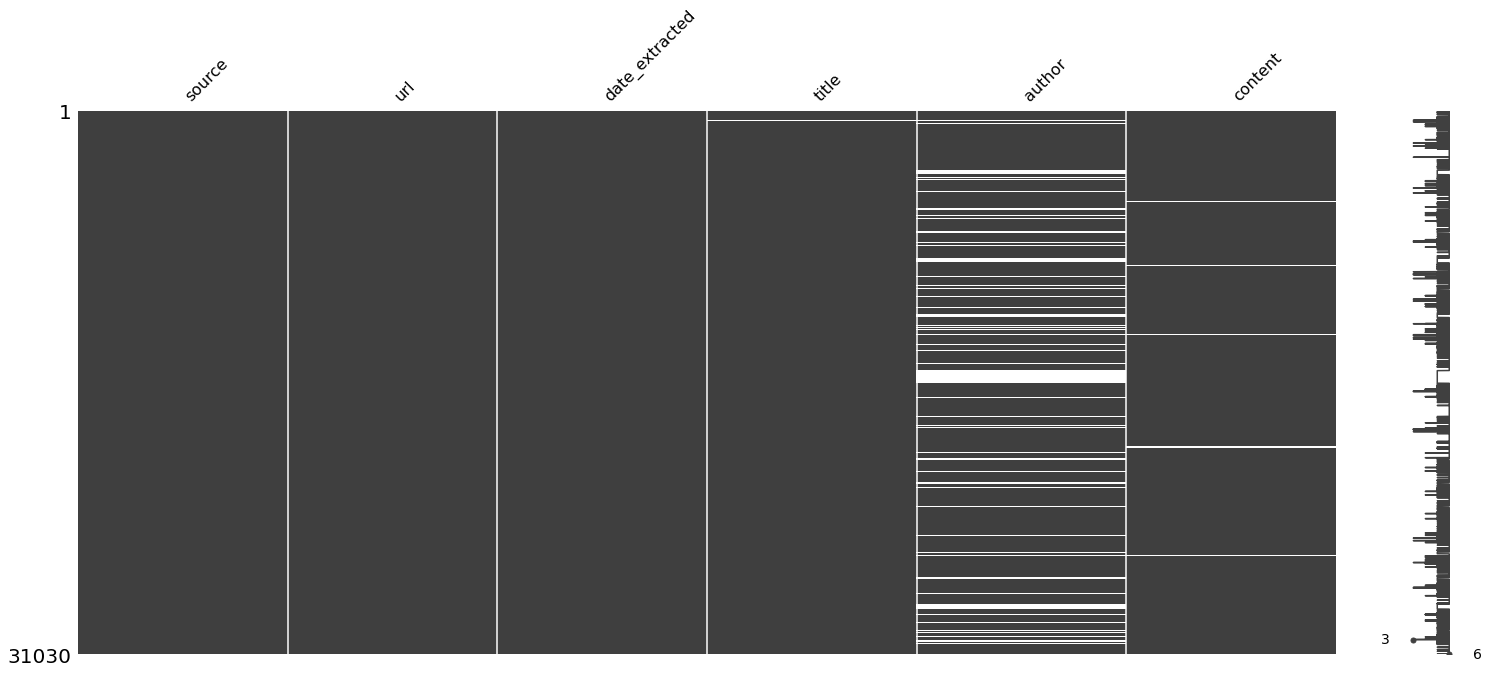

In [12]:
msno.matrix(ArNews_df)

In [13]:
ArNews_df = ArNews_df[ArNews_df.content.isnull() == False]
ArNews_df = ArNews_df[ArNews_df.author.isnull() == False]
ArNews_df = ArNews_df[ArNews_df.title.isnull() == False]
#reset index 
ArNews_df = ArNews_df.reset_index(drop=True)

ArNews_df.content.isnull().any() #false 

False

In [14]:
# Removing unwanted characters and stop words  
#remove punctuation 
p = re.compile(r'[^\w\s]+')
ArNews_df['content'] = [p.sub('', x) for x in ArNews_df['content'].tolist()]

#remove \n from the content 
ArNews_df['content'] = ArNews_df.content.str.replace("\xa0","") 
ArNews_df['content'] = ArNews_df.content.str.replace("\n"," ")
ArNews_df['content'] = ArNews_df.content.str.replace("_ ","")
ArNews_df['content'] = ArNews_df.content.str.replace("- ","")
ArNews_df['content'] = ArNews_df.content.str.replace(":","")
ArNews_df['content'] = ArNews_df.content.str.replace("»","")
ArNews_df['content'] = ArNews_df.content.str.replace("«","")

#remove strings connected to symbols    
ArNews_df['content'] = ArNews_df.content.str.replace("سبق","")
ArNews_df['content'] = ArNews_df.content.str.replace("سبق-","")
ArNews_df['content'] = ArNews_df.content.str.replace("- -","")

#remove digits/numbers  
ArNews_df['content'] = ArNews_df['content'].str.replace('\d+', '')

# remove parentheses () and data inside them 
ArNews_df["content"] = ArNews_df["content"].str.replace(r" \(.*\)","")


/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_15934/3804166305.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_15934/3804166305.py:24: FutureWarning: The default value of regex will change from True to False in a future version.


In [15]:
#fix the source/news paper names just because 
ArNews_df['source'] = ArNews_df.source.str.replace("aawsat","Al Sharq Al Awsat")
ArNews_df['source'] = ArNews_df.source.str.replace("aleqtisadiya","Al Eqtisadiya")
ArNews_df['source'] = ArNews_df.source.str.replace("aljazirah","Al Jazirah")
ArNews_df['source'] = ArNews_df.source.str.replace("almadina","Al Madina")
ArNews_df['source'] = ArNews_df.source.str.replace("alriyadh","Al Riyadh")
ArNews_df['source'] = ArNews_df.source.str.replace("alwatan","Al Watan")
ArNews_df['source'] = ArNews_df.source.str.replace("alweeam","Al Weeam")
ArNews_df['source'] = ArNews_df.source.str.replace("alyaum","Al Yaum")
ArNews_df['source'] = ArNews_df.source.str.replace("okaz","Okaz")
ArNews_df['source'] = ArNews_df.source.str.replace("sabq","Sabq")
ArNews_df['source'] = ArNews_df.source.str.replace("arreyadi","Arreyadi")
ArNews_df['source'] = ArNews_df.source.str.replace("arriyadiyah","Arriyadiyah")

#author column cleaning 
ArNews_df['author'] = [p.sub('', x) for x in ArNews_df['author'].tolist()]
ArNews_df['author'] = ArNews_df.author.str.replace("سبق","")
ArNews_df['author'] = ArNews_df.author.str.replace("واس","")
ArNews_df['author'] = ArNews_df.author.str.replace("\xa0","")

In [16]:
ArNews_df['words_before_stop'] = ArNews_df["content"].apply(nltk.word_tokenize)

In [17]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
ArNews_df['words_stem'] = ArNews_df['words_before_stop'].apply(lambda x: [st.stem(y) for y in x])

In [18]:
#remove stop words 
ArNews_df['words_after_stop']= ArNews_df['words_stem'].apply(lambda x: [item for item in x if item not in arabic_stopwords_list])

In [19]:
#number of words before and after stop words removal 
ArNews_df['word_count_stop'] = ArNews_df['words_before_stop'].str.len() #before 
ArNews_df['word_count_wo_stop'] = ArNews_df['words_after_stop'].str.len() #after 

In [20]:
#Remove short articles 
ArNews_df = ArNews_df[ArNews_df.word_count_stop != ArNews_df.word_count_wo_stop]

In [92]:
# News Source vs Content 
Source_Content = Counter(ArNews_df["source"])
Source_Content_df = pd.DataFrame(
    {'source': Source_Content.keys(),
     'articles_count': Source_Content.values(),
    })
Source_Content_df = Source_Content_df.reset_index()
Source_Content_df.sort_values(by=["articles_count"])


,index,source,articles_count
10,10,Arriyadiyah,52
11,11,Arreyadi,83
9,9,Sabq,1390
3,3,Al Madina,1957
6,6,Al Weeam,2044
5,5,Al Watan,2107
0,0,Al Sharq Al Awsat,2602
8,8,Okaz,2703
1,1,Al Eqtisadiya,2747
2,2,Al Jazirah,2828


Text(0, 0.5, 'Number_of_Articles')

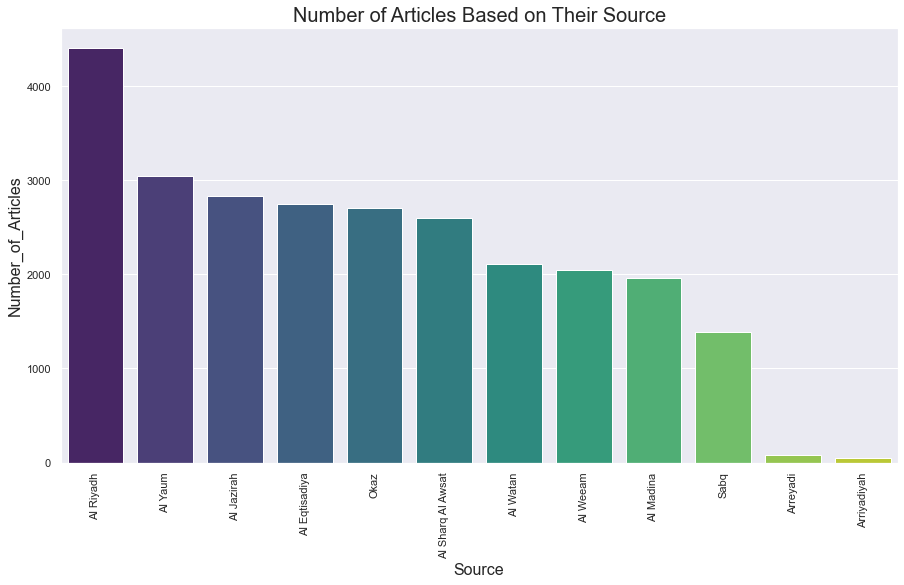

In [223]:
# plot the 
sns.barplot(x="source", 
            y="articles_count",
            data= Source_Content_df,
            order=Source_Content_df.sort_values('articles_count',ascending = False).source,
            palette=sns.color_palette("viridis", 12)
            )
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 12})
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Number of Articles Based on Their Source', fontsize=20)
plt.xlabel('Source', fontsize=16)
plt.ylabel('Number_of_Articles', fontsize=16)

Insight: 
Al Riyadh has the most articles in this data are. since, it is one of the leading news platform in KSA 
While the Arriyadi has the least number of aricles . 

Check what topics does it cover based keywords 

Text(0, 0.5, 'Length')

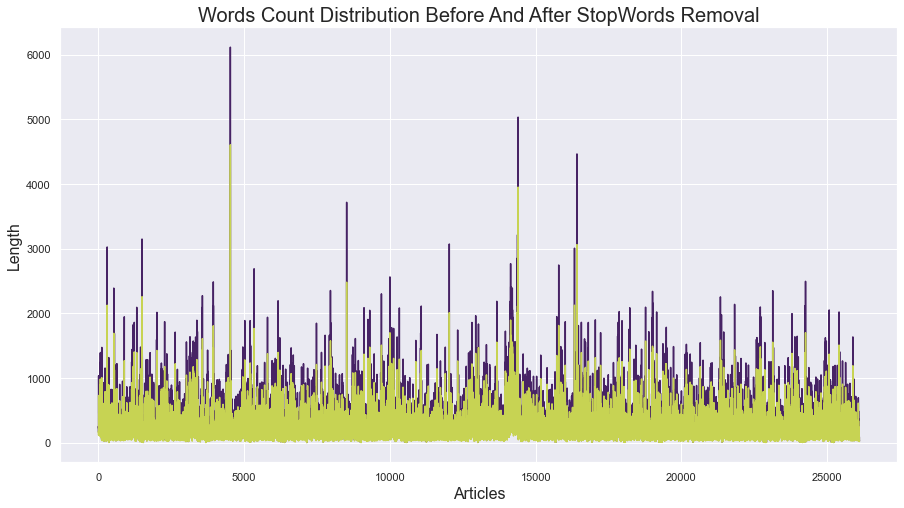

In [224]:

plt.plot(ArNews_df.word_count_stop, color='#472365')
plt.plot(ArNews_df.word_count_wo_stop, color='#C7D353')
plt.title('Words Count Distribution Before And After StopWords Removal', fontsize=20)
plt.xlabel('Articles', fontsize=16)
plt.ylabel('Length', fontsize=16)


Insight: 
most articles had drop in words count except for 4 articles when are already small in size  

In [ ]:
sum(ArNews_df["words_before_stop"])

In [ ]:
sum(ArNews_df["words_after_stop"])

In [26]:
ArNews_df['Detokenize'] = ArNews_df["words_after_stop"].apply(detokenizer.detokenize)

In [163]:
#top 10 words after stemming 
Top_words = Counter(" ".join(ArNews_df["Detokenize"]).split()).most_common(15)
words = [t for t,n in Top_words]
frequency = [n for t,n in Top_words]
Top_words_df = pd.DataFrame({'words': words,'frequency': frequency})
Top_words_df.sort_values(by=["frequency"])

,words,frequency
14,كثر,20517
13,خدم,20909
12,وقع,21632
11,نظم,23522
10,سلم,24267
9,رئس,24649
8,دول,25152
7,شرك,25893
6,خلل,26312
5,قدم,28662


Text(0, 0.5, 'Length')

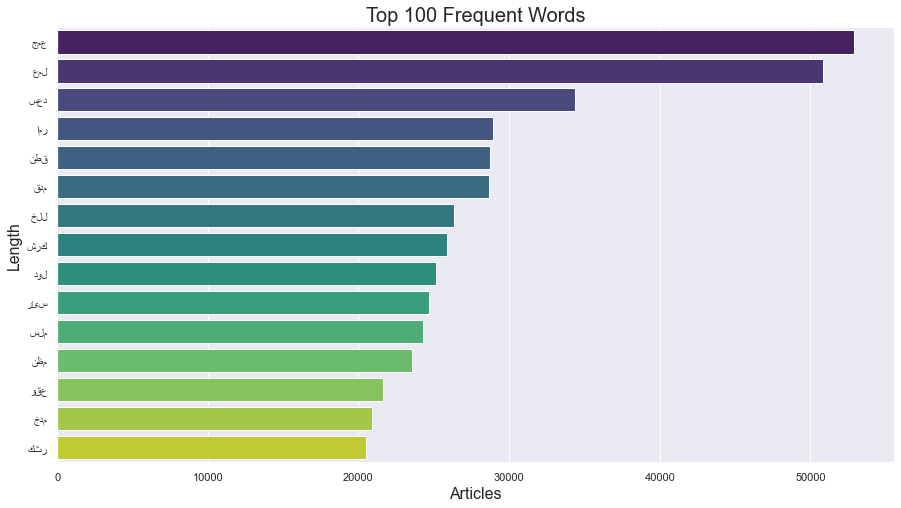

In [225]:
#plot of the top 50 words 
sns.barplot(x="frequency", 
            y="words", 
            data=Top_words_df, 
            palette=sns.color_palette("viridis", 15)
            )
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Top 100 Frequent Words', fontsize=20)
plt.xlabel('Articles', fontsize=16)
plt.ylabel('Length', fontsize=16)

Text(0.5, 1.0, 'WordCloud: Top 100 Frequent Words')

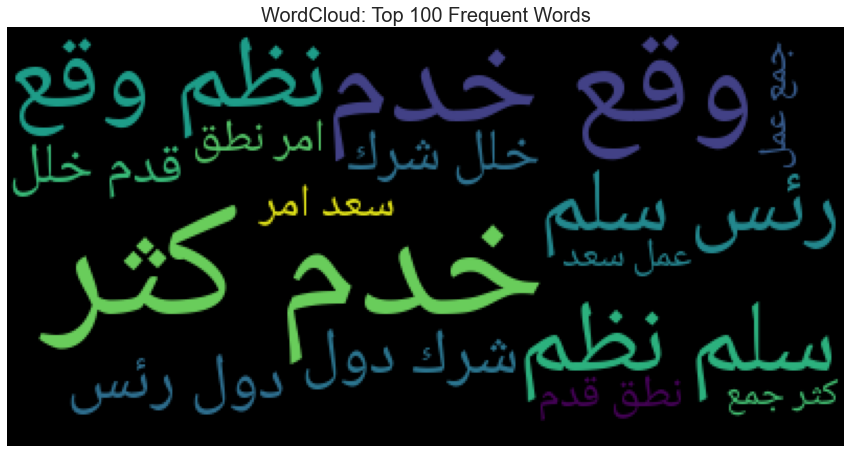

In [226]:
from ar_wordcloud import ArabicWordCloud

texts = [' '.join(Top_words_df['words']) for comment in Top_words_df['words']]
texts = ' '.join(texts)
awc = ArabicWordCloud(background_color="black").generate(texts)
wc = awc.from_text(texts)
plt.imshow(wc)
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,8)
plt.title('WordCloud: Top 100 Frequent Words', fontsize=20)
